In [1]:

# Importing basic libraries for data analysis
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
sns.set_theme()
# Setting the best style for the plots in seaborn
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
# Reading the data from the csv file
df = pd.read_csv('airline_df.csv')
df.head()

,Airline,Country,Review,Date_Published,Type of Traveller,Seat Type,Route,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value for Money,Recommended
0,indigo-airlines,India,✅ Trip Verified | Flight was punctual. But no ...,2023-05-10,Solo Leisure,Economy Class,Abu Dhabi to Kochi,1.0,1.0,1.0,NaN,3.0,1.0,no
1,indigo-airlines,India,"✅ Trip Verified | My sister, niece and mother...",2023-05-07,Family Leisure,Economy Class,Mumbai to Mangalore,1.0,NaN,NaN,NaN,1.0,1.0,no
2,indigo-airlines,India,✅ Trip Verified | My 77-year-old father was fl...,2023-04-28,Solo Leisure,Economy Class,Abu Dhabi to Kochi,2.0,2.0,NaN,NaN,2.0,4.0,no
3,indigo-airlines,India,Not Verified | IndiGo are a low cost airline ...,2023-04-24,Solo Leisure,Economy Class,Jaipur to Ahmedabad,2.0,2.0,NaN,NaN,2.0,3.0,yes
4,indigo-airlines,India,✅ Trip Verified | My flight 6e 1176 which was...,2023-04-22,Family Leisure,Economy Class,Colombo to Mumbai via Chennai,1.0,1.0,1.0,1.0,1.0,1.0,no


In [3]:
# Description of the data
df.describe(include='all')

,Airline,Country,Review,Date_Published,Type of Traveller,Seat Type,Route,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value for Money,Recommended
count,15220,15220,15220,15220,10974,15047,10962,14222.000000,14208.000000,13085.000000,11762.000000,10720.000000,15044.000000,15220
unique,19,9,15205,3718,4,4,6716,NaN,NaN,NaN,NaN,NaN,NaN,2
top,emirates,India,Manchester to Doha and then Bangkok 24th Janua...,2015-01-14,Solo Leisure,Economy Class,Guangzhou to Sydney,NaN,NaN,NaN,NaN,NaN,NaN,yes
freq,2266,3640,2,39,4534,11214,30,NaN,NaN,NaN,NaN,NaN,NaN,8913
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.425116,3.588401,3.343676,3.432409,3.213433,3.372108,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.390692,1.524603,1.439589,1.408876,1.637206,1.533749,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN


In [4]:
# Info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15220 entries, 0 to 15219
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Airline                 15220 non-null  object 
 1   Country                 15220 non-null  object 
 2   Review                  15220 non-null  object 
 3   Date_Published          15220 non-null  object 
 4   Type of Traveller       10974 non-null  object 
 5   Seat Type               15047 non-null  object 
 6   Route                   10962 non-null  object 
 7   Seat Comfort            14222 non-null  float64
 8   Cabin Staff Service     14208 non-null  float64
 9   Food & Beverages        13085 non-null  float64
 10  Inflight Entertainment  11762 non-null  float64
 11  Ground Service          10720 non-null  float64
 12  Value for Money         15044 non-null  float64
 13  Recommended             15220 non-null  object 
dtypes: float64(6), object(8)
memory usage:

In [5]:
# Checking the null values in the data
df.isnull().sum().sort_values(ascending=False)

Ground Service            4500
Route                     4258
Type of Traveller         4246
Inflight Entertainment    3458
Food & Beverages          2135
Cabin Staff Service       1012
Seat Comfort               998
Value for Money            176
Seat Type                  173
Airline                      0
Country                      0
Review                       0
Date_Published               0
Recommended                  0
dtype: int64

In [6]:
# Separating the numerical and categorical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()
obj_col = df.select_dtypes(include='object').columns.tolist()
cat_col = [x for x in obj_col if df[x].nunique() < 21]

print('Numerical Columns: ',num_col)
print('Categorical Columns: ',cat_col)

Numerical Columns:  ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Inflight Entertainment', 'Ground Service', 'Value for Money']
Categorical Columns:  ['Airline', 'Country', 'Type of Traveller', 'Seat Type', 'Recommended']


# Data Cleaning and Preprocessing

* ### Data Imputation

In [9]:
# Imputing the missing values in the numerical columns with mode using simple imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=7)
df[num_col] = imputer.fit_transform(df[num_col])

# As well as changing the data type of the numerical columns to int8
df[num_col] = df[num_col].astype('int8')
# Changing the Date_Published column to datetime format

df['Date_Published'] = pd.to_datetime(df['Date_Published'])
# Sort the data by Airline and Date_Published so that we can fill the missing values in the categorical columns

df.sort_values(by=['Airline','Date_Published'],inplace=True)
# Imputing the missing values in the categorical columns with mode using Backward fill
df[obj_col] = df[obj_col].fillna(method='bfill')

# Mapping Recommended to 1 and Not Recommended to 0
df['Recommended'] = df['Recommended'].map({'yes':1,'no':0})

# Taking the feature from Categorical Columns which have less than 20 unique values

cat_col = [x for x in df[cat_col] if df[x].nunique() < 21]

print('Categorical Columns: ',cat_col)

# As well as changing the data type of the categorical columns to category
df[cat_col] = df[cat_col].astype('category')

# Creating a new Column Overall Rating by taking the mean of all the ratings given by the user upto 2 decimal places

df['Overall_Rating'] = df[num_col].mean(axis=1).round()

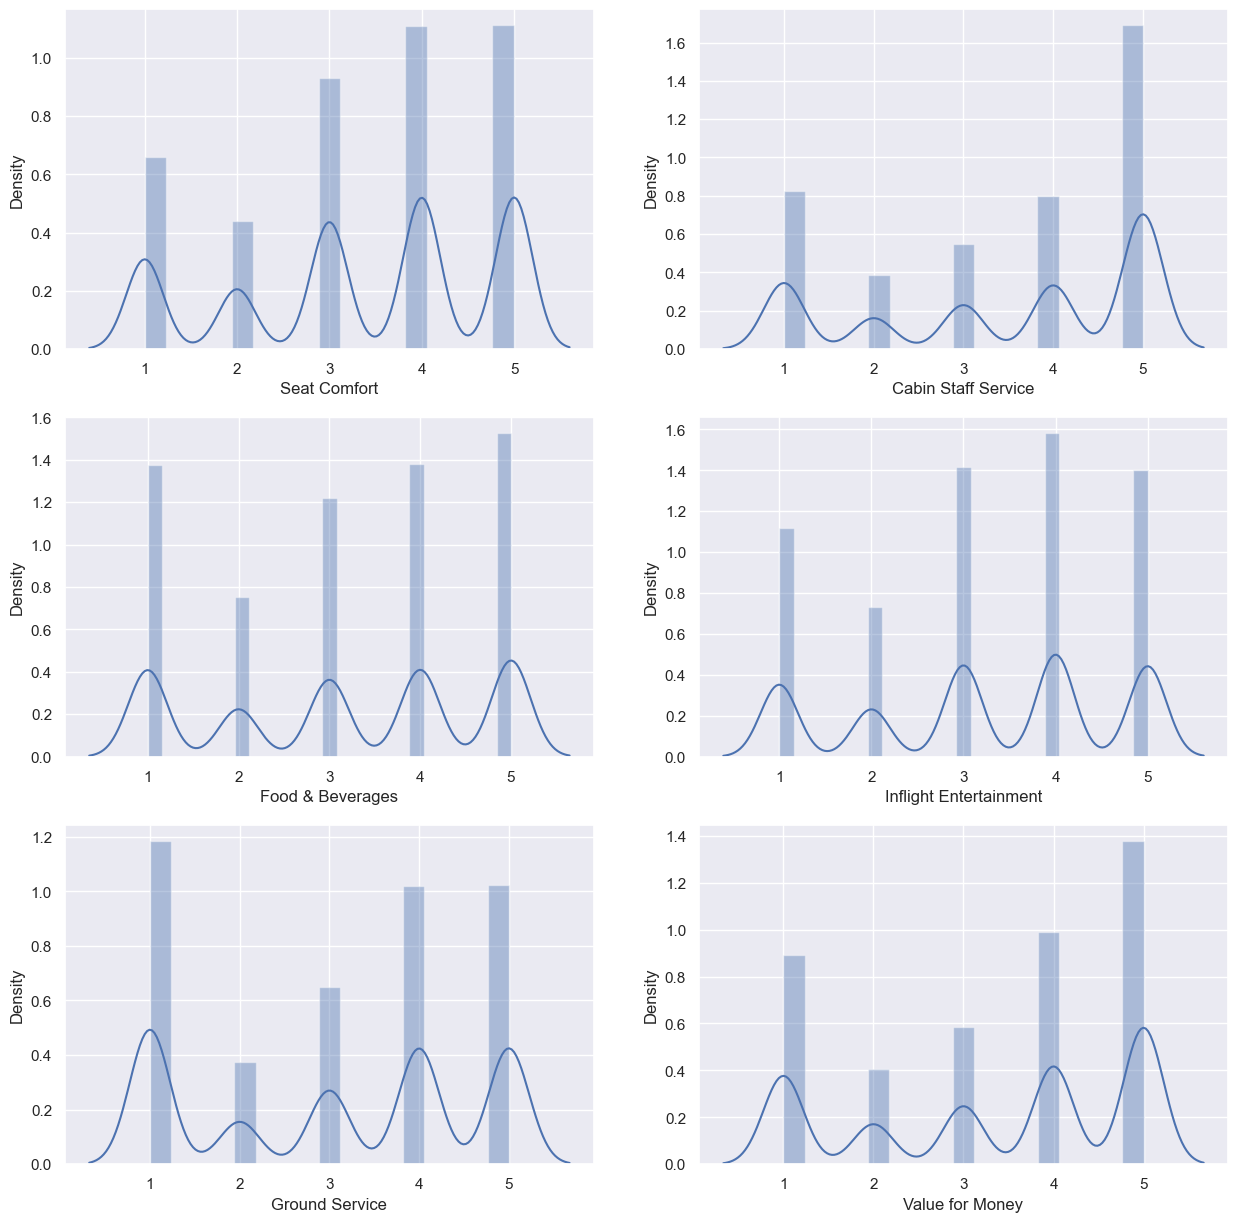

In [16]:
# Now Plotting the distribution of the numerical columns after imputing the missing values

fig , ax = plt.subplots(3,2,figsize=(15,15))

for i, subplot in zip(num_col, ax.flatten()):
    sns.distplot(df[i], ax=subplot)
plt.show()

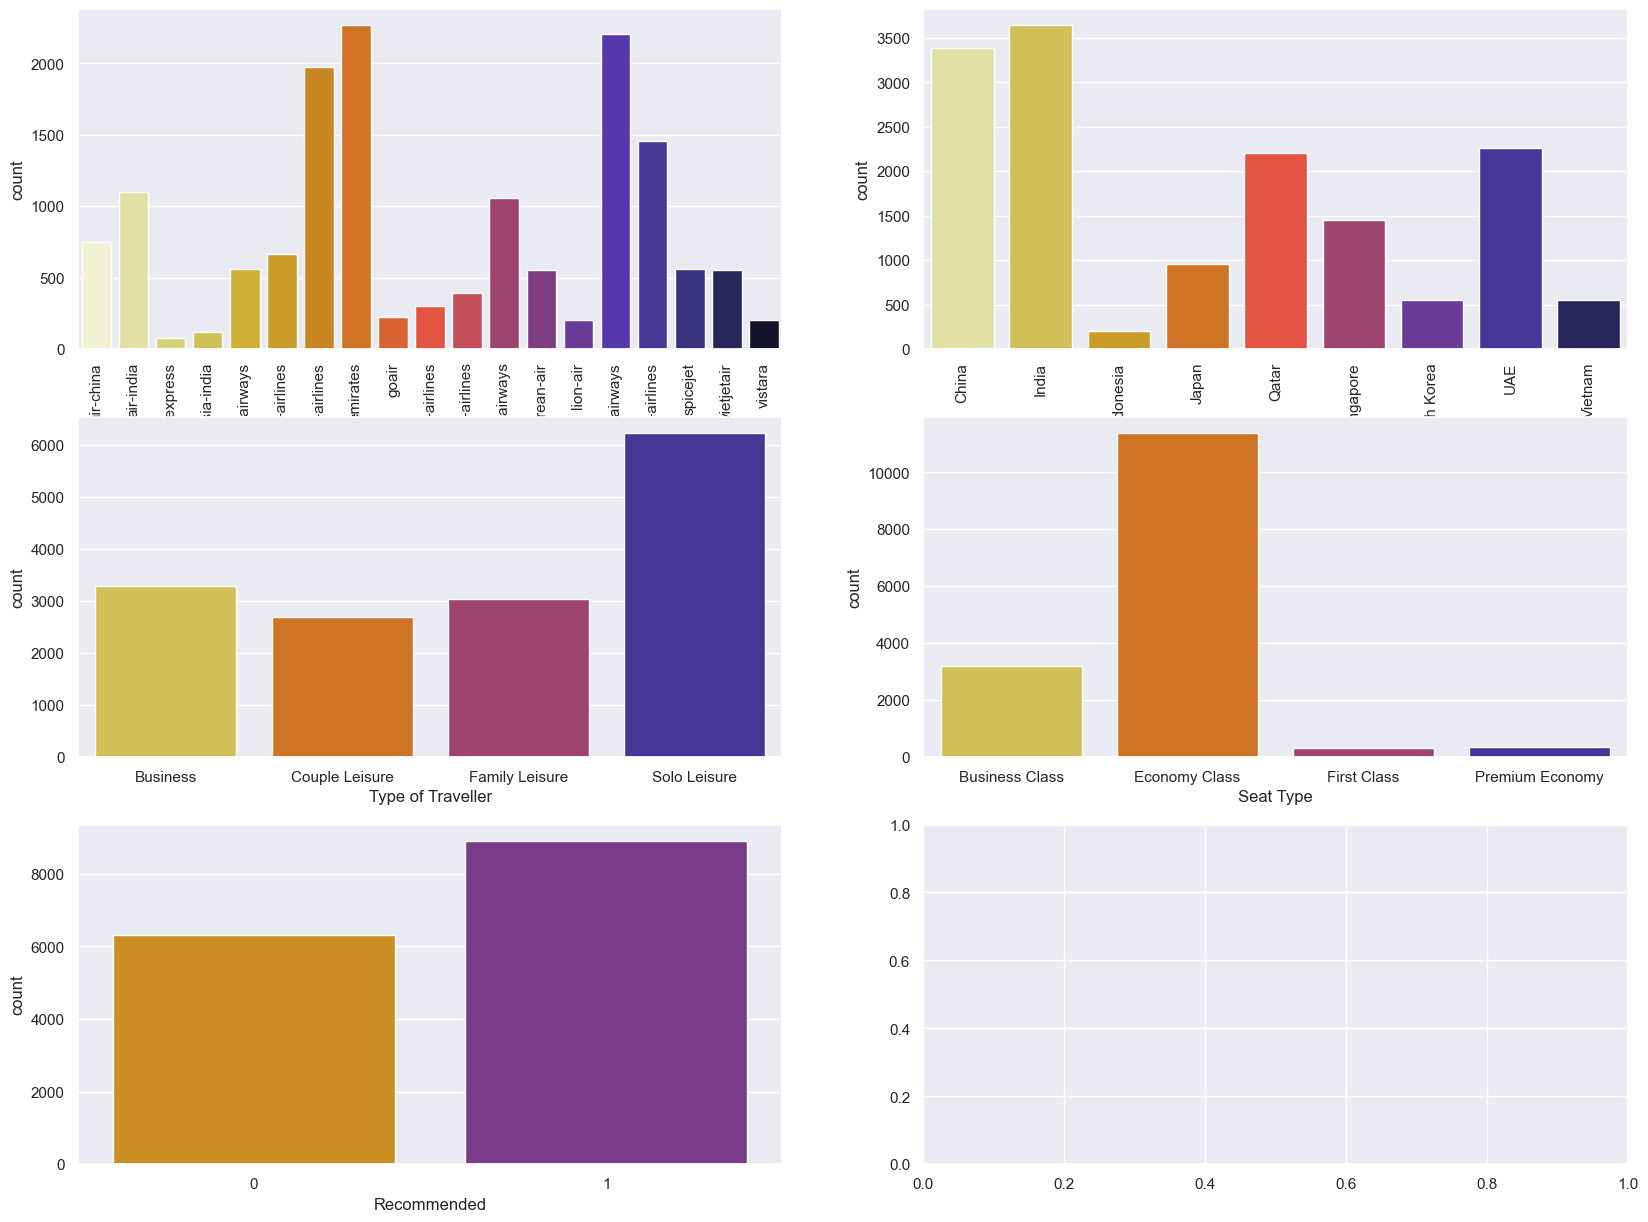

In [17]:
# Plotting the distribution of the categorical columns after imputing the missing values

fig , ax = plt.subplots(3,2,figsize=(20,15))

for i, subplot in zip(cat_col, ax.flatten()):
    sns.countplot(x=i,data=df, ax=subplot, palette='CMRmap_r')
    if i in ['Airline','Country']:
        for label in subplot.get_xticklabels():
            label.set_rotation(90)
plt.show()

In [18]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

14


In [19]:
df.to_csv('airline_df_cleaned.csv',index=False)